# Clustering & dimentionality reduction 

...



In [133]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Again we load the dataset with the reading and speech data. 

In [134]:
df = read_csv("./datasets/data_eye_speech.csv")
df

,vp_code,eyemovement_rate,speech_rate,reading_speed,group
0,001,4.876513,4.929337,45.454545,1
1,ABAFT17,5.029528,5.039975,83.116883,1
2,ACNMG09,5.299456,4.870547,57.142857,1
3,AKAFF09,4.690483,4.440987,64.935065,1
4,AMAMG16,5.067032,5.375254,63.636364,1
...,...,...,...,...,...
129,RE1201,5.093700,3.995258,7.250000,0
130,FA1902,4.399105,3.950355,6.750000,0
131,TD2102,4.466783,3.765455,7.500000,0
132,CA1101,4.366029,4.293169,5.000000,0


To see if an unsupervised clustering algorithm can identify the two groups in our dataset we first need to combine our features (eyemovement_rate, speech_rate, reading_speed) in `X` and store our group variable in `y`.

In [141]:
X = df[["eyemovement_rate","speech_rate","reading_speed"]]
y = df["group"]

Next we intialize our clustering algorithm. Here we use `KMeans`, a simple unsupervised clustering method. Important to note is that we need to specify the number of number of clusters in advance. We define the number with 2 in the current example by setting `n_clusters=2`. After that we fit the model. Remember the model has no target varaible anymore, i.e., a specificity of the unsupervised learning method. 

In [142]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

Next we evaluate our clusters by predicting the lable of each datapoint on the basis of our fitted clustering model. Here we use the Silhouette score. The score compares the distance of any datapoint of to all other points in the cluster with the distance to all other datapoints in other clusters. The score is 1 when the data point `i` is very compact within it's cluster and far away from the other clusters.

In [143]:
predictions = kmeans.predict(X)
print("Silhouette Score:", silhouette_score(X, predictions))

Silhouette Score: 0.7599565027846913


A Silhouette score of .76 is quite high, but not very surprining in our example as we know that there have been two groups of readers. So let's look at the data with the cluster lables, with a scatterplot. To do this we need first to decide which measures will be on the x and y axis of the figure. Since our groups have been selected based on the reading speed measure included in the features it makes sense to use this measure. In addiation, we use the eye-movement sampling rate. 

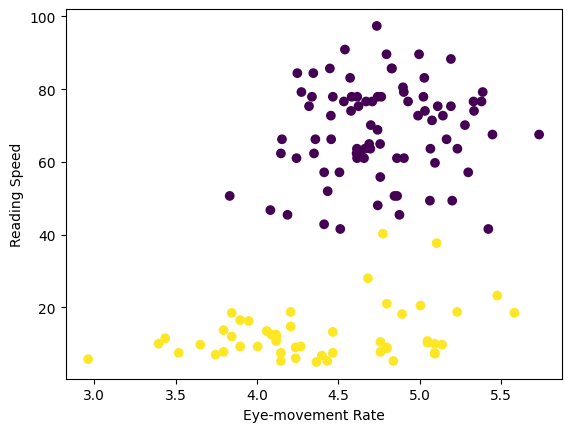

In [147]:
plt.scatter(X.eyemovement_rate, X.reading_speed, c=predictions)
plt.xlabel("Eye-movement Rate")
plt.ylabel("Reading Speed")
plt.show()

Let's compare this figure with a figure of the real lables and estimate the overlap between the lables from the k-means clustering. 

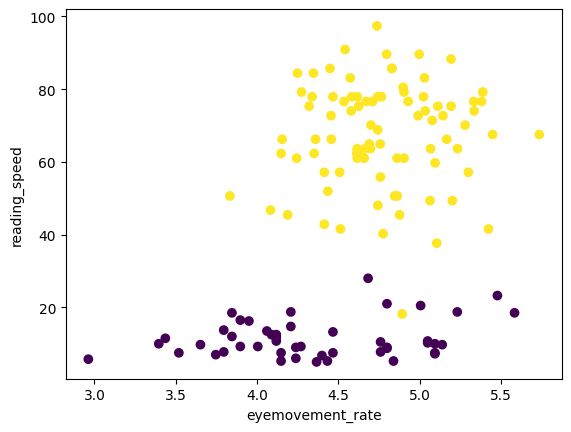

Accuracy/Error: 0.022388059701492536


In [149]:
plt.scatter(X.eyemovement_rate, X.reading_speed, c=y)
plt.xlabel("eyemovement_rate")
plt.ylabel("reading_speed")
plt.show()
print("Accuracy/Error:", np.mean(predictions == y))

Silhouette Score: 0.7599565027846913


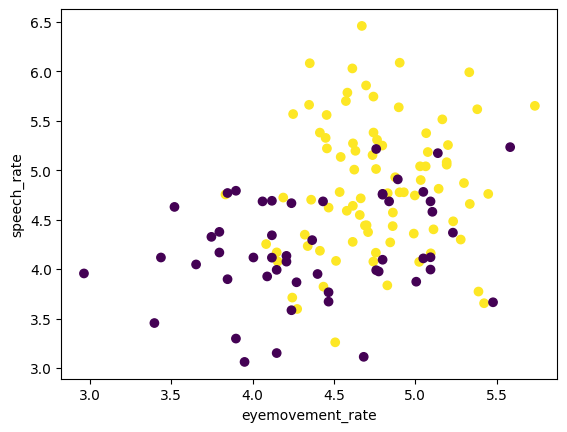

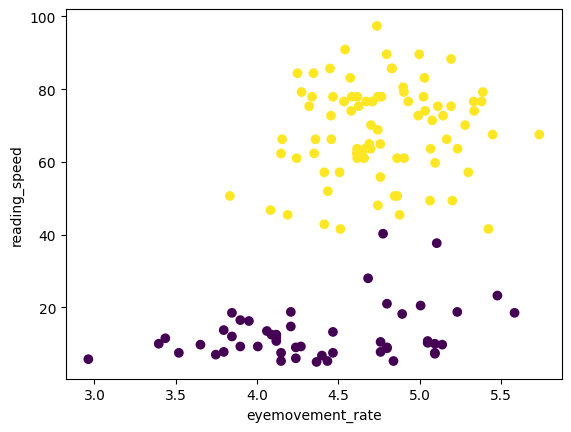

Accuracy: 0.9776119402985075


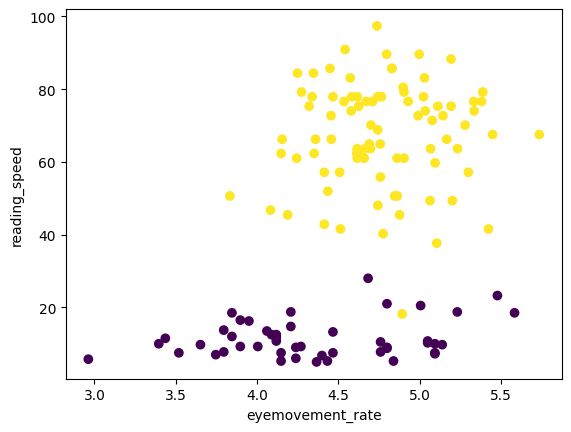

In [140]:
plt.scatter(X.eyemovement_rate, X.speech_rate, c=predictions)
plt.xlabel("eyemovement_rate")
plt.ylabel("speech_rate")
plt.show()
plt.scatter(X.eyemovement_rate, X.reading_speed, c=predictions)
plt.xlabel("eyemovement_rate")
plt.ylabel("reading_speed")
plt.show()

print("Accuracy:", np.mean(predictions == y))
plt.scatter(X.eyemovement_rate, X.reading_speed, c=y)
plt.xlabel("eyemovement_rate")
plt.ylabel("reading_speed")
plt.show()

Silhouette Score: 0.7612776730466079


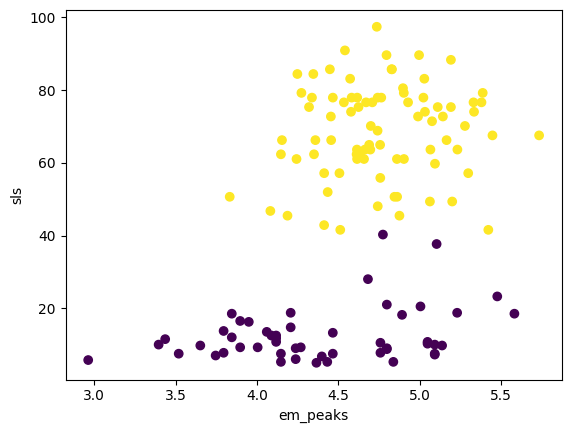

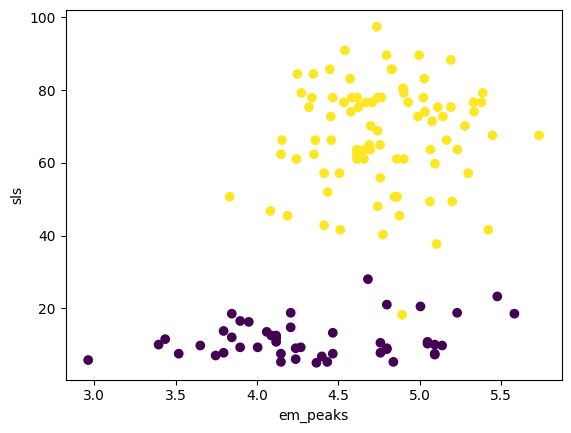

Accuracy: 0.9776119402985075


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [110]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# select the features and target column
X = df_all[["em_peaks", "sls"]]
y = df_all["group"]

# initialize the KMeans model
kmeans = KMeans(n_clusters=2)

# fit the model to the data
kmeans.fit(X)

# predict the labels
predictions = kmeans.predict(X)

# print the silhouette score
print("Silhouette Score:", silhouette_score(X, predictions))

# create a scatter plot to visualize the results
plt.scatter(X.em_peaks, X.sls, c=predictions)
plt.xlabel("em_peaks")
plt.ylabel("sls")
plt.show()
# create a scatter plot to visualize the results
plt.scatter(X.em_peaks, X.sls, c=y)
plt.xlabel("em_peaks")
plt.ylabel("sls")
plt.show()
print("Accuracy:", np.mean(predictions == y))
predictions

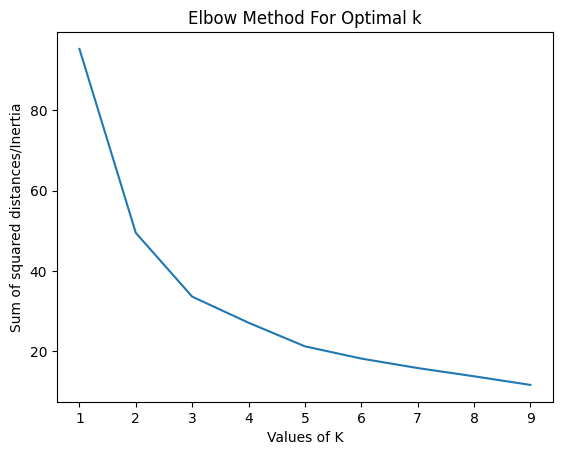

In [130]:
X = df_all[["em_peaks","mean_peaks","sls"]]
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K,Sum_of_squared_distances)
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

Silhouette Score: 0.6337195315628347


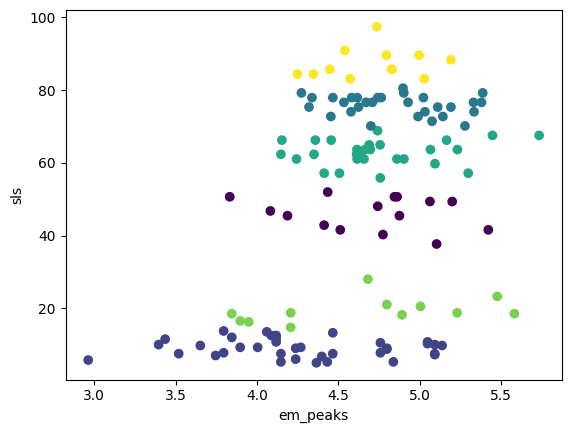

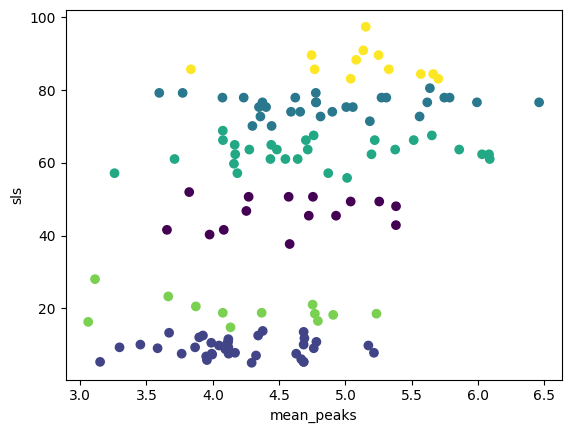

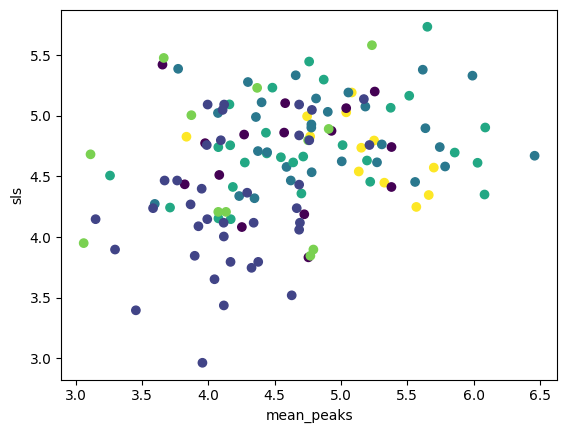

Accuracy: 0.0


array([0, 5, 3, 3, 3, 2, 3, 2, 0, 5, 2, 2, 5, 2, 0, 2, 2, 4, 2, 3, 3, 3,
       2, 3, 0, 3, 3, 0, 3, 0, 5, 0, 3, 2, 3, 2, 2, 0, 2, 2, 5, 2, 2, 5,
       5, 2, 5, 2, 3, 3, 3, 0, 3, 0, 2, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 2,
       5, 3, 5, 0, 2, 0, 5, 0, 2, 3, 3, 3, 2, 2, 2, 3, 5, 2, 2, 2, 4, 1,
       4, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [129]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# select the features and target column
X = df_all[["em_peaks","mean_peaks","sls"]]
y = df_all["group"]

# initialize the KMeans model
kmeans = KMeans(n_clusters=6)

# fit the model to the data
kmeans.fit(X)

# predict the labels
predictions = kmeans.predict(X)

# print the silhouette score
print("Silhouette Score:", silhouette_score(X, predictions))

# create a scatter plot to visualize the results
plt.scatter(X.em_peaks, X.sls, c=predictions)
plt.xlabel("em_peaks")
plt.ylabel("sls")
plt.show()
# create a scatter plot to visualize the results
plt.scatter(X.mean_peaks, X.sls, c=predictions)
plt.xlabel("mean_peaks")
plt.ylabel("sls")
plt.show()
# create a scatter plot to visualize the results
plt.scatter(X.mean_peaks, X.em_peaks, c=predictions)
plt.xlabel("mean_peaks")
plt.ylabel("sls")
plt.show()
print("Accuracy:", np.mean(predictions == y))
predictions